# Introduction

This notebook backtests 2000 stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import get_hist, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_2000.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.to_list()

In [5]:
%time myPnL_df, my_Capital_df, possible_trades_df, buy_opportunities_df = backtester("backtest_2000.log", tickers, "10y", 10000, 5)

After aplying exclude list 1961 stocks left

After applying good tickers filter 436 stocks left for simulation



local minima and maxima: 100%|██████████| 436/436 [03:25<00:00,  2.12it/s]



Unable to determine local minima and maxima for the following tickers:
['WM']
Simulating with remaining 435 stocks



possible trades: 100%|██████████| 435/435 [09:14<00:00,  1.28s/it]



Possible trades to simulate: 4291
Trading days to simulate   : 742



simulate trades:   5%|▌         | 38/742 [00:07<01:44,  6.76it/s]


********************
*** WARNING      *** capital changed by more than 10% for SGMO on 2017-05-11 00:00:00!
***              *** no_shares=501.5309173972975 share_price=7.0 today_amount=3510.7164217810828
***              *** orig_amount=2031.2002154590548 close_amount=2181.659490678244 delta_amount=1329.056931102839
********************



simulate trades: 100%|██████████| 742/742 [02:59<00:00,  4.13it/s]


Today's buying recommendations:

Empty DataFrame
Columns: [ticker, buy_date, daily_ret, gain_ratio, e_gain_daily_ret, e_loss_daily_ret, day_gain, day_loss, day_zero]
Index: []


Yesterday's buying recommendations:

Empty DataFrame
Columns: [ticker, buy_date, daily_ret, gain_ratio, e_gain_daily_ret, e_loss_daily_ret, day_gain, day_loss, day_zero]
Index: []

CPU times: user 28min 16s, sys: 8.18 s, total: 28min 25s
Wall time: 15min 43s


In [6]:
tdf = pd.read_csv(f'{DATAPATH}ticker_stats.csv')
tdf

,ticker,mean_gain,std_gain,cnt_gain,pct_gain,day_gain,gain_daily_ret,mean_loss,std_loss,cnt_loss,...,total_buy,total_sell,total_days,total_cnt,total_pct,daily_ret,gain_ratio,e_gain_daily_ret,e_loss_daily_ret,good
0,PIH,0.200000,0.183394,7,3.852504,13.142857,0.041097,-0.607500,0.647003,2,...,48.30,46.95,213,9,-2.795031,-0.013308,0.777778,0.031964,0.009133,0
1,FCCY,0.800000,0.852807,6,4.439512,24.000000,0.030170,-0.400000,0.322224,8,...,259.15,260.75,291,14,0.617403,0.002115,0.428571,0.012930,0.017240,0
2,SRCE,2.112308,2.701719,13,4.408554,26.384615,0.012578,-2.180000,2.355589,3,...,768.21,789.13,412,16,2.723214,0.006522,0.812500,0.010220,0.002358,0
3,MMM,7.825000,4.613965,6,4.065181,23.666667,0.028065,-23.777000,15.028848,2,...,1568.40,1567.25,388,8,-0.073323,-0.000189,0.750000,0.021049,0.007016,0
4,ATEN,0.590000,0.288704,5,9.210116,20.400000,0.086413,0.000000,0.000000,0,...,32.03,34.98,102,5,9.210116,0.086413,1.000000,0.086413,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,ZN,0.375000,0.723187,8,22.624434,24.375000,0.104648,-0.239250,0.255619,2,...,16.45,19.03,294,10,15.683891,0.049567,0.800000,0.083718,0.020930,1
1826,ZION,2.293636,1.497513,11,5.077685,28.454545,0.015825,-1.000000,NaN,1,...,539.71,563.94,315,12,4.489448,0.013943,0.916667,0.014507,0.001319,1
1827,ZIOP,0.517273,0.547304,11,12.189374,13.545455,0.077223,-0.398778,0.372898,9,...,94.25,94.94,387,20,0.732095,0.001885,0.550000,0.042473,0.034750,0
1828,ZIXI,0.795000,1.278886,6,13.927007,13.166667,0.165184,-0.293333,0.180370,3,...,52.25,56.14,167,9,7.444976,0.043008,0.666667,0.110123,0.055061,0


In [7]:
buy_opportunities_df.sort_values(by='buy_date')

,ticker,buy_date,buy_close,trading_days,gain_pct,daily_return,mean_gain,std_gain,cnt_gain,pct_gain,...,total_buy,total_sell,total_days,total_cnt,total_pct,daily_ret,gain_ratio,e_gain_daily_ret,e_loss_daily_ret,good
61,BURL,2018-09-14,164.0200,200.000000,28.185000,0.225000,17.890000,7.783375,4,10.703282,...,668.5800,740.1400,266,4,10.703282,0.038234,1.000000,0.038234,0.000000,1
58,BGG,2018-10-05,18.0157,40.000000,4.620000,0.245000,1.846500,1.504539,3,9.207257,...,80.3977,84.7078,227,4,5.360974,0.023008,0.750000,0.071837,0.023946,1
345,SC,2018-10-24,16.5000,109.000000,29.390000,0.240000,4.850000,NaN,1,29.393939,...,16.5000,21.3500,109,1,29.393939,0.236694,1.000000,0.236694,0.000000,1
199,IEA,2018-10-29,9.8800,43.000000,5.870000,0.295000,0.565000,0.063640,2,5.854922,...,19.3000,20.4300,86,2,5.854922,0.066184,1.000000,0.066184,0.000000,1
395,UNT,2018-11-05,23.7100,28.750000,11.912500,0.627500,2.247500,1.697751,4,11.853903,...,75.8400,84.8300,115,4,11.853903,0.097459,1.000000,0.097459,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,MET,2020-02-28,42.7200,16.750000,1.052500,0.248750,0.775000,0.558032,16,1.720096,...,943.2000,953.0900,280,21,1.048558,0.003725,0.761905,0.008330,0.002603,1
35,ASH,2020-02-28,71.5400,24.250000,2.508750,0.112500,1.737000,1.294132,10,2.394178,...,871.6400,887.4100,209,12,1.809233,0.008580,0.833333,0.012804,0.002561,1
226,KREF,2020-02-28,19.6400,35.000000,-1.090000,-0.030000,0.840000,0.183848,2,4.490778,...,37.4100,39.0900,47,2,4.490778,0.093509,1.000000,0.093509,0.000000,1
159,FCPT,2020-02-28,28.6900,35.000000,2.223333,0.213333,0.596667,0.525579,3,2.213703,...,80.8600,82.6500,105,3,2.213703,0.020855,1.000000,0.020855,0.000000,1


In [8]:
buy_df = pd.merge(buy_opportunities_df, tdf, how='inner')

In [9]:
buy_df.loc[buy_df.buy_date == '2020-02-28'].sort_values(by='daily_ret', ascending=False)[0:5]

,ticker,buy_date,buy_close,trading_days,gain_pct,daily_return,mean_gain,std_gain,cnt_gain,pct_gain,...,total_buy,total_sell,total_days,total_cnt,total_pct,daily_ret,gain_ratio,e_gain_daily_ret,e_loss_daily_ret,good
226,KREF,2020-02-28,19.64,35.000000,-1.090000,-0.030000,0.840000,0.183848,2,4.490778,...,37.41,39.09,47,2,4.490778,0.093509,1.000000,0.093509,0.000000,1
293,PCTY,2020-02-28,129.52,75.000000,13.035000,0.160000,10.505000,2.340523,2,12.440786,...,168.88,189.89,150,2,12.440786,0.078202,1.000000,0.078202,0.000000,1
146,FICO,2020-02-28,376.03,28.500000,6.326250,0.405000,13.763750,17.414568,8,8.087938,...,1361.41,1471.52,231,8,8.087938,0.033674,1.000000,0.033674,0.000000,1
84,CHDN,2020-02-28,125.64,24.363636,5.974545,0.384545,5.645000,5.487461,10,6.950686,...,902.99,957.90,268,11,6.080909,0.022029,0.909091,0.031989,0.003199,1
291,PAAS,2020-02-28,19.80,19.600000,3.857000,0.328000,0.711111,0.384267,9,5.215549,...,156.10,162.30,184,11,3.971813,0.021171,0.818182,0.025062,0.005569,1


In [10]:
buy_df.columns

Index(['ticker', 'buy_date', 'buy_close', 'trading_days', 'gain_pct',
       'daily_return', 'mean_gain', 'std_gain', 'cnt_gain', 'pct_gain',
       'day_gain', 'gain_daily_ret', 'mean_loss', 'std_loss', 'cnt_loss',
       'pct_loss', 'day_loss', 'loss_daily_ret', 'day_zero', 'zero_cnt',
       'total_buy', 'total_sell', 'total_days', 'total_cnt', 'total_pct',
       'daily_ret', 'gain_ratio', 'e_gain_daily_ret', 'e_loss_daily_ret',
       'good'],
      dtype='object')

# Summary Chart

This chart provides an overview of well the backtest went and how it increased or decreased the initial capital over time.

In [11]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-03-24 00:00:00')

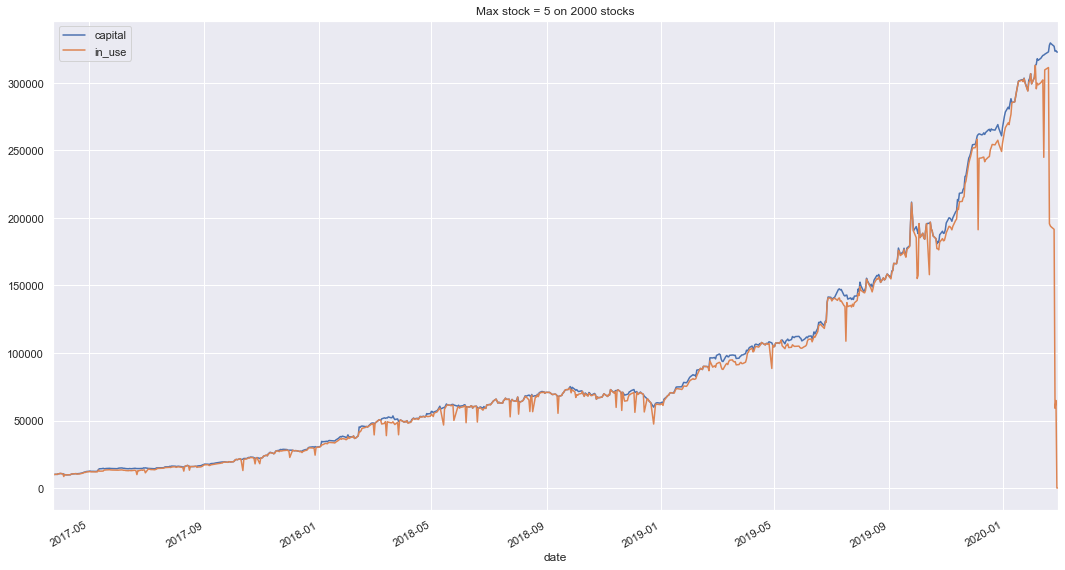

In [12]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 2000 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [13]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df['daily_comp_pct'] = (((1 + sell_df.gain_pct/100) ** (1/ sell_df.days_in_trade)) - 1)*100
sell_df

,date,ticker,action,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_pct,days_in_trade,invested,gain,gain_pct,daily_comp_pct
0,2017-03-27,BHC,SELL,2000.000000,2011.162791,186.046512,9.675,11.162791,0.558140,2,0,11.162791,0.56,0.279609
0,2017-03-27,TREE,SELL,2000.000000,2014.303744,16.827934,106.965,14.303744,0.715187,2,0,14.303744,0.72,0.359354
0,2017-03-28,GCO,SELL,2000.000000,2014.324082,35.810206,50.265,-8.952551,-0.442478,3,0,14.324082,0.72,0.239426
0,2017-03-28,TGI,SELL,2002.232558,2043.698913,84.625214,21.294,41.466355,2.071006,2,0,41.466355,2.07,1.029699
0,2017-03-28,INSG,SELL,2000.000000,1990.867580,913.242009,1.971,-18.264840,-0.909091,3,0,-9.132420,-0.46,-0.153569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-02-20,PAYS,SELL,64134.144341,69009.437969,6866.610743,8.406,411.996645,0.600601,4,0,4875.293628,7.60,1.848132
0,2020-02-25,AWI,SELL,64342.521346,66522.342396,630.006084,91.917,-359.103468,-0.536925,8,0,2179.821050,3.39,0.417595
0,2020-02-25,CCBG,SELL,65684.108803,62355.220296,2234.153361,26.460,-1094.735147,-1.725352,4,0,-3328.888507,-5.07,-1.292337
0,2020-02-26,NXRT,SELL,52813.293729,59486.365825,1215.495828,39.105,413.268582,0.699588,47,0,6673.072096,12.64,0.253569


In [14]:
sell_df.describe()

,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_pct,days_in_trade,invested,gain,gain_pct,daily_comp_pct
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.0,432.000000,432.000000,432.000000
mean,15243.938905,15968.246910,1943.810190,39.205259,7.260394,0.452972,9.398148,0.0,724.308005,4.674329,0.305120
std,14161.409280,15183.876332,3436.763157,79.598690,754.477284,6.173300,13.814105,0.0,3554.990381,15.483409,1.309232
min,1798.941799,1798.941799,6.240215,0.360000,-6109.530137,-23.846154,2.000000,0.0,-9256.863844,-21.430000,-4.444620
25%,4547.577745,5127.949960,210.268874,5.296500,-151.116464,-1.314435,2.000000,0.0,-134.328773,-1.237500,-0.362561
50%,11834.867790,11755.384715,654.017201,14.935500,17.184412,0.151817,4.000000,0.0,90.854257,1.200000,0.268636
75%,20336.243372,20702.307147,2181.309313,38.657250,152.867116,1.763905,11.000000,0.0,649.922525,5.482500,0.877670
max,65684.108803,80739.999802,32555.902078,753.093000,5684.131030,86.956522,128.000000,0.0,44303.341825,122.460000,8.508064


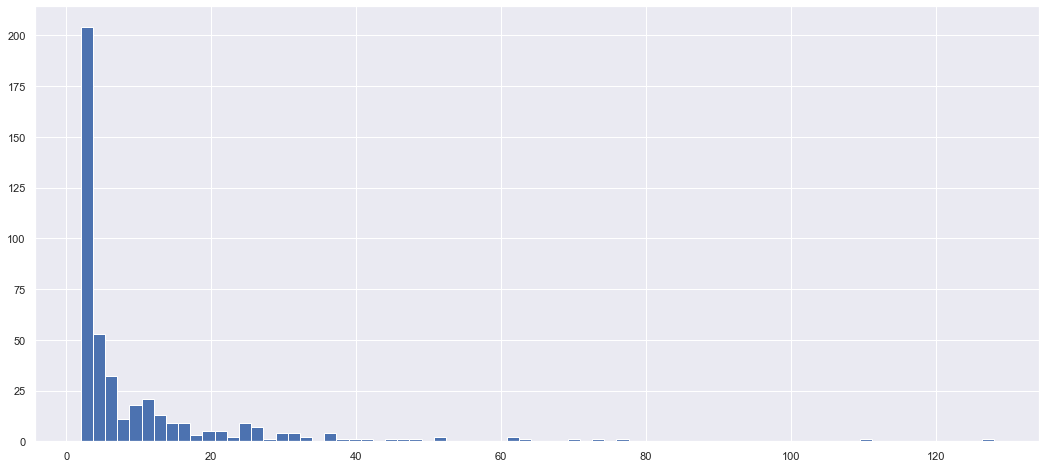

In [15]:
sell_df.days_in_trade.hist(bins=75, figsize=(18,8))

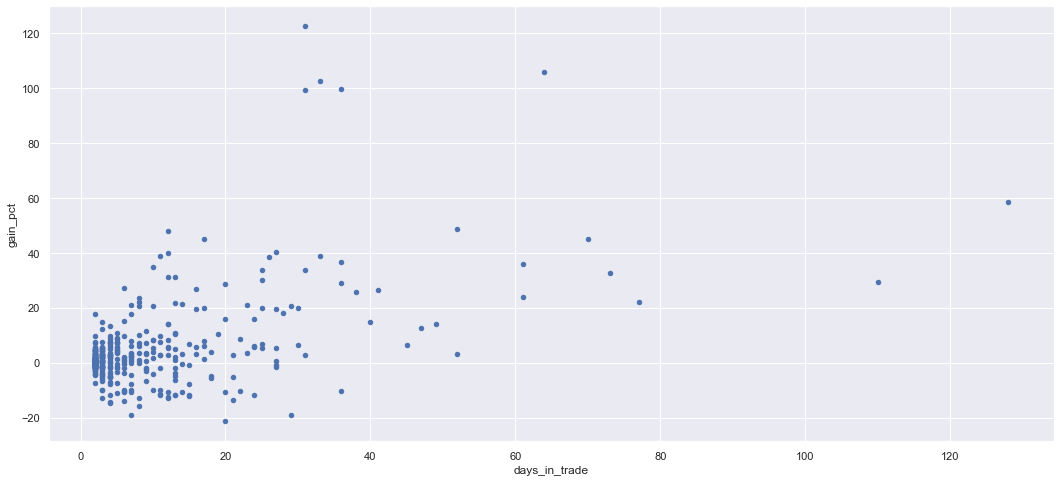

In [16]:
sell_df.plot.scatter(x='days_in_trade', y='gain_pct', figsize=(18,8))

In [17]:
possible_trades_df.columns

Index(['buy_date', 'buy_close', 'sell_date', 'sell_close', 'gain_pct',
       'trading_days', 'daily_return', 'ticker', 'gain_daily_ret'],
      dtype='object')

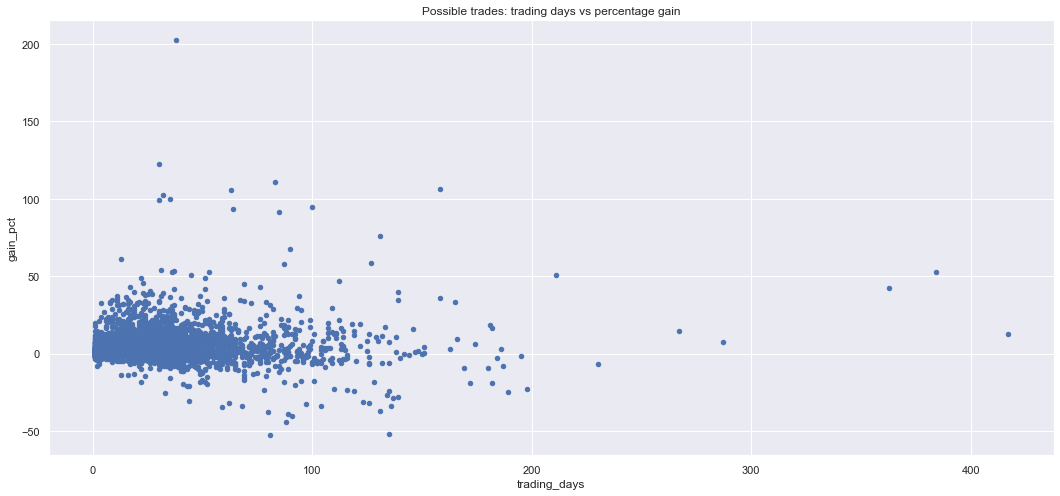

In [18]:
possible_trades_df.plot.scatter(x='trading_days', y='gain_pct', figsize=(18,8))
plt.title('Possible trades: trading days vs percentage gain')
plt.show()

In [19]:
sell_df['gain'][sell_df.gain > 0].agg(['sum', 'count'])

sum      418373.363914
count       277.000000
Name: gain, dtype: float64

In [20]:
sell_df['gain'][sell_df.gain < 0].agg(['sum', 'count'])

sum     -105472.305895
count       151.000000
Name: gain, dtype: float64

In [21]:
sell_df['gain'][sell_df.gain == 0].agg(['sum', 'count'])

sum      0.0
count    4.0
Name: gain, dtype: float64

In [22]:
possible_trades_df['gain']=possible_trades_df.sell_close - possible_trades_df.buy_close

In [23]:
possible_trades_df

,buy_date,buy_close,sell_date,sell_close,gain_pct,trading_days,daily_return,ticker,gain_daily_ret,gain
0,2018-10-08,5.92,2018-11-07,6.49,9.63,22,0.42,ATEN,0.086413,0.57
1,2019-05-24,6.21,2019-07-19,7.57,21.90,38,0.52,ATEN,0.086413,1.36
2,2019-08-26,6.95,2019-09-26,7.14,2.73,22,0.12,ATEN,0.086413,0.19
3,2019-10-15,6.49,2019-10-31,7.43,14.48,12,1.13,ATEN,0.086413,0.94
4,2019-12-03,6.46,2019-12-23,6.93,7.28,14,0.50,ATEN,0.086413,0.47
...,...,...,...,...,...,...,...,...,...,...
4286,2019-08-02,22.75,2019-10-11,31.19,37.10,49,0.65,ZUMZ,0.044088,8.44
4287,2019-10-21,33.07,2019-11-05,32.63,-1.33,11,-0.12,ZUMZ,0.044088,-0.44
4288,2019-12-02,30.58,2019-12-20,31.86,4.19,14,0.29,ZUMZ,0.044088,1.28
4289,2020-01-03,33.83,2020-01-10,33.78,-0.15,5,-0.03,ZUMZ,0.044088,-0.05


In [24]:
possible_trades_df['gain'][possible_trades_df.gain > 0].agg(['sum', 'count'])

sum      13690.7796
count     3429.0000
Name: gain, dtype: float64

In [25]:
possible_trades_df['gain'][possible_trades_df.gain < 0].agg(['sum', 'count'])

sum     -1947.5762
count     840.0000
Name: gain, dtype: float64

In [26]:
possible_trades_df['gain'][possible_trades_df.gain == 0].agg(['sum', 'count'])

sum       0.0
count    22.0
Name: gain, dtype: float64

In [27]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

,date,ticker,action,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_pct,days_in_trade,invested,gain,gain_pct,daily_comp_pct
0,2018-08-02,EPZM,SELL,12197.482912,9583.736573,968.054199,11.340,-3000.968018,-23.846154,20,0,-2613.746338,-21.43,-1.198659
0,2018-03-27,UNT,SELL,9079.575635,7332.318472,440.115154,18.567,-1197.113220,-14.035088,29,0,-1747.257163,-19.24,-0.734148
0,2019-12-05,VNRX,SELL,48876.241096,39619.377252,9256.863844,4.752,-6109.530137,-13.360324,7,0,-9256.863844,-18.94,-2.955177
0,2018-08-17,ELOX,SELL,13193.884984,11095.490891,928.492962,12.789,-1699.142120,-13.280116,8,0,-2098.394093,-15.90,-2.141287
0,2019-04-29,NOVN,SELL,20908.317081,17819.588421,23759.451228,0.792,-2613.539635,-12.790698,4,0,-3088.728660,-14.77,-3.916653
0,2018-12-14,TMQ,SELL,13673.640990,11702.092754,6359.833018,1.935,-1081.171613,-8.457711,4,0,-1971.548236,-14.42,-3.818162
0,2018-08-14,ENPH,SELL,9637.678805,8291.359109,1641.853289,5.283,-525.393052,-5.959032,6,0,-1346.319697,-13.97,-2.476715
0,2019-10-01,ODT,SELL,31653.173735,27375.415958,1116.908036,25.506,-1697.700214,-5.839416,21,0,-4277.757777,-13.51,-0.688767
0,2019-10-02,REKR,SELL,35531.047982,30896.563463,15448.281731,2.070,-1853.793808,-5.660377,8,0,-4634.484519,-13.04,-1.731361
0,2018-10-24,ARWR,SELL,13474.927011,11731.804185,979.282486,12.384,-959.696837,-7.561728,12,0,-1743.122826,-12.94,-1.148130


In [28]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

,date,ticker,action,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_pct,days_in_trade,invested,gain,gain_pct,daily_comp_pct
0,2019-12-05,MRSN,SELL,36177.838084,80481.179908,19346.437478,1.683,-386.928750,-0.478469,31,0,44303.341825,122.46,2.612832
0,2020-02-05,ENPH,SELL,39265.320955,80739.999802,2187.483062,16.155,21.874831,0.027100,64,0,41474.678847,105.63,1.132787
0,2017-05-12,SGMO,SELL,2031.200215,4112.553523,501.530917,3.645,601.837101,17.142857,33,0,2081.353307,102.47,2.160652
0,2018-03-09,ENPH,SELL,6972.662661,13909.383762,3594.156011,1.746,287.532481,2.110818,36,0,6936.721101,99.48,1.936692
0,2018-02-13,ZN,SELL,6138.861512,12220.881714,2842.065515,1.944,5684.131030,86.956522,31,0,6082.020202,99.07,2.245770
0,2019-09-05,MEDP,SELL,19748.790482,31317.182990,378.546875,46.953,507.252813,1.646394,128,0,11568.392508,58.58,0.360875
0,2019-08-13,SYRS,SELL,22161.347174,32941.527917,3756.160538,5.310,450.739265,1.387283,52,0,10780.180744,48.64,0.765138
0,2018-01-04,CCXI,SELL,5589.595877,8259.967880,957.122582,5.256,2335.379099,39.418417,12,0,2670.372003,47.77,3.307580
0,2019-11-20,OVID,SELL,30191.714194,43753.767629,16145.301708,1.683,-2906.154307,-6.228374,70,0,13562.053435,44.92,0.531424
0,2019-09-30,VNRX,SELL,31970.392517,46307.630399,8239.791886,3.492,1318.366702,2.930403,17,0,14337.237882,44.85,2.203506


In [29]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(150, 0.3472222222222222)

In [30]:
myPnL_df

,date,ticker,action,orig_amount,close_amount,no_shares,stop_loss,daily_gain,daily_pct,days_in_trade,invested
0,2017-03-24,IVC,BUY,2000.000000,2000.000000,181.488203,9.918,0.000000,0.000000,0,0
0,2017-03-24,INSG,BUY,2000.000000,2000.000000,913.242009,1.971,0.000000,0.000000,0,0
0,2017-03-24,GCO,BUY,2000.000000,2000.000000,35.810206,50.265,0.000000,0.000000,0,0
0,2017-03-24,TREE,BUY,2000.000000,2000.000000,16.827934,106.965,0.000000,0.000000,0,0
0,2017-03-24,BHC,BUY,2000.000000,2000.000000,186.046512,9.675,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
0,2020-02-25,NXRT,CLOSE,52813.293729,59073.097244,1215.495828,39.105,-2212.202407,-3.609679,46,0
0,2020-02-26,NXRT,SELL,52813.293729,59486.365825,1215.495828,39.105,413.268582,0.699588,47,0
0,2020-02-26,MSBF,BUY,64788.044937,64788.044937,3996.794876,14.589,0.000000,0.000000,0,0
0,2020-02-26,MSBF,CLOSE,64788.044937,64788.044937,3996.794876,14.589,0.000000,0.000000,1,0


In [31]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['BHC', 'TREE', 'GCO', 'TGI', 'INSG', 'BOOM', 'ARWR', 'NBIX', 'ZN',
        'EXR', 'PAYS', 'SGMO', 'CORT', 'SKYW', 'CSV', 'ZUMZ', 'MU', 'HSII',
        'AEL', 'HMSY', 'NX', 'VECO', 'AMD', 'CMG', 'BGG', 'RF', 'ERII',
        'BLDP', 'EXAS', 'ANIP', 'HD', 'INS', 'ATLC', 'JBSS', 'RGLD',
        'GEOS', 'GLDD', 'MGRC', 'IVC', 'MELI', 'WLFC', 'HCA', 'CASS',
        'AQN', 'SPAR', 'PLOW', 'RE', 'IOVA', 'RST', 'NOA', 'JBL', 'UNT',
        'CRMT', 'TNAV', 'COST', 'ENT', 'ELOX', 'PEGA', 'ABIO', 'IVR',
        'FLT', 'PCTI', 'GLUU', 'PODD', 'CSX', 'SAFM', 'WTT', 'LULU', 'UI',
        'KL', 'CCXI', 'MRCY', 'ACRE', 'LHX', 'SYNA', 'AJRD', 'TMQ', 'DCO',
        'EEFT', 'CCMP', 'UTI', 'SANM', 'PANW', 'AGYS', 'VNRX', 'CHEF',
        'MPWR', 'EBF', 'MTRN', 'LYV', 'ENPH', 'AUBN', 'CTHR', 'TACT',
        'IEA', 'CDW', 'FOXF', 'POST', 'TLRA', 'OFIX', 'IQV', 'EPZM', 'RMD',
        'LAWS', 'PVG', 'D', 'SEM', 'ALSN', 'AUG', 'REPH', 'ESNT', 'DIOD',
        'AUPH', 'NLTX', 'OUT', 'KEYS', 'BTG', 'SALT', 

In [32]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

,ticker,gain
59,ENPH,51889.420166
111,MRSN,44303.341825
71,FRTA,14102.163367
130,PAYS,13744.462247
128,OVID,13562.053435
150,SALT,11691.363714
106,MEDP,11568.392508
160,SYRS,10780.180744
43,COUP,10489.467792
93,JILL,9771.661243


In [33]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

,ticker,gain
142,REKR,-4634.484519
125,ODT,-4277.757777
34,CCBG,-3328.888507
122,NOVN,-3088.728660
95,KL,-2940.958642
73,GEOS,-2345.087005
6,ALPN,-1790.845458
33,CC,-1691.668108
159,SYNA,-1648.448453
85,IOVA,-1506.764428


In [34]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

,ticker,gain
111,MRSN,44303.341825
128,OVID,13562.053435
59,ENPH,12972.355042
106,MEDP,11568.392508
160,SYRS,10780.180744
43,COUP,10489.467792
93,JILL,9771.661243
156,SNDX,9688.197582
71,FRTA,7051.081683
119,NEXA,6256.262363


In [35]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

,ticker,gain
142,REKR,-4634.484519
125,ODT,-4277.757777
34,CCBG,-3328.888507
122,NOVN,-3088.728660
6,ALPN,-1790.845458
33,CC,-1691.668108
28,BPRN,-1443.000195
73,GEOS,-1172.543502
96,KREF,-1092.717828
112,MSBF,-1039.166668


In [36]:
myCapital_df.tail()

,date,capital,in_use,free
date,,,,
2020-02-24,2020-02-24,327193,191617,135576
2020-02-25,2020-02-25,323527,59073.1,264454
2020-02-26,2020-02-26,323940,64788,259152
2020-02-27,2020-02-27,322901,5.09317e-11,322901
2020-02-28,2020-02-28,322901,5.09317e-11,322901


In [37]:
len(possible_trades_df)

4291

In [38]:
possible_trades_df.to_csv(f'{DATAPATH}possible_trades_2000.csv', index=False)
myCapital_df.to_csv(f'{DATAPATH}capital_2000.csv', index=False)
myPnL_df.to_csv(f'{DATAPATH}PnL_2000.csv', index=False)

In [39]:
ls ../data

F13_Renaissance_tech.csv  capital_0500.csv          possible_trades_1500.csv
F13_Renaissance_tech.txt  capital_1000.csv          possible_trades_2000.csv
PnL_0100.csv              capital_1500.csv          stocks.csv
PnL_0500.csv              capital_2000.csv          stocks_100.csv
PnL_1000.csv              exclude.csv               stocks_1000.csv
PnL_1500.csv              optimal_params.csv        stocks_2000.csv
PnL_2000.csv              possible_trades_0100.csv  stocks_500.csv
bak/                      possible_trades_0500.csv  ticker_stats.csv
capital_0100.csv          possible_trades_1000.csv
